In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split

## Анализ данных

Проблемка - датасет про машины как-то странно класеризуется. Примерно никак. Возможно это из-за категориальных признаков, но хз

In [2]:
import matplotlib.pyplot as plt

class Plotter(object):
    def __init__(self, X, y1, y2=None, header=None):
        self.X = X
        self.y1 = y1
        self.y2 = y2
        self.header = header

    @staticmethod
    def plot_2d_scatter(X, y, ax, name, features, header):
        try:
            label = []
            for _ in y:
                if _ == 0:
                    label.append("purple")
                elif _ == 1:
                    label.append("orange")
                elif _ == 2:
                    label.append("red")
            
            f1_values = X[:, features][:, 0]
            f2_values = X[:, features][:, 1]

            ax.scatter(f1_values, f2_values, c=label)
            ax.set_title(name)
            ax.set_xlabel(header[features[0]])
            ax.set_ylabel(header[features[1]])

        except TypeError as e:
            print("\nNo label data was provided.\n")
            raise e

    @staticmethod 
    def save_to_file(path):
        plt.savefig(path)
        plt.close()

    def horizontal_plots(self, features: tuple):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        fig.tight_layout(pad=5.0)

        name_true = "Y True"
        name_pred = "Predicted Clusters"

        self.plot_2d_scatter(self.X, self.y1, ax1, name_true,
                             features, self.header)
        self.plot_2d_scatter(self.X, self.y2, ax2, name_pred,
                             features, self.header)

        self.save_to_file(f"../output/{features}.png")


    def saveall_2d_scatter(self):
        count_features = self.X.shape[1]

        for f1 in range(count_features):
            for f2 in range(count_features):
                if f1 == f2:
                    continue
                else:
                    self.horizontal_plots((f1, f2))


In [79]:
def norm_data(data: pd.DataFrame):
    norm_data = data.copy()
    for column in data.columns:
        maximum = data[column].max()
        minimum = data[column].min()
        norm_data[column] = (norm_data[column] - minimum) / (maximum - minimum)
    return norm_data

def plot_heatmap(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True)
    plt.show()

def plot_clusters(x: np.ndarray, clusters: np.ndarray, features: tuple):
    plt.figure(figsize=(10, 10))
    f1, f2 = features
    cluster_list = np.unique(clusters)
    for c in cluster_list:
        plt.scatter(x[clusters == c, f1], x[clusters == c, f2], s=100, label=f'Claster {c}')
    plt.legend()
    plt.show()

def plot_outliers(data):
    num_columns = len(data.columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(num_columns*2,6))
    fig.suptitle('Outliers\n', size = 25)

    for i, column in enumerate(data.columns):

        sns.boxplot(ax=axes[i], data=data[column], palette='Spectral').set_title(column)

    plt.tight_layout()

def calculate_f1(clusters):
    # HARDCODE!
    hc_clusters = [] 
    
    for v in clusters:
        if v == 0:
            hc_clusters.append(2)
        if v == 1:
            hc_clusters.append(0)
        if v == 2:
            hc_clusters.append(1)

    hc_clusters = np.array(hc_clusters)

    print("F1 micro: ", f1_score(y, hc_clusters, average="micro"))
    print("F1 macro: ", f1_score(y, hc_clusters, average="macro"))
    print("F1 weighted: ", f1_score(y, hc_clusters, average="weighted"))


In [80]:
from sklearn.datasets import load_iris
iris_ds = load_iris(as_frame=True)
X_iris = iris_ds['data'].to_numpy()
y_iris = iris_ds['target'].to_numpy()
data = iris_ds['frame']

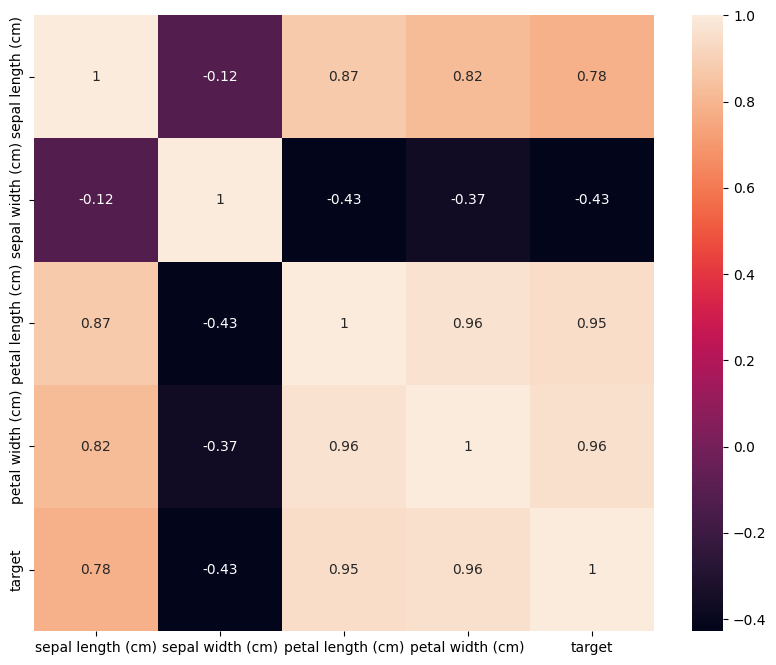

In [81]:
plot_heatmap(data)

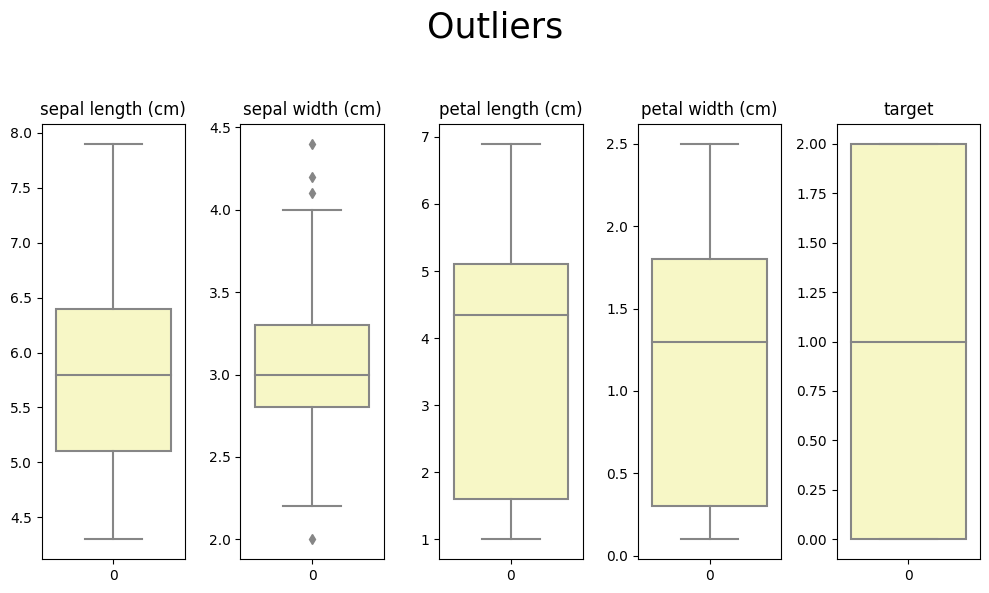

In [6]:
plot_outliers(data)

In [89]:
data[(data['sepal width (cm)'] > 4) | (data['sepal width (cm)'] < 2.1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [9]:
data = data.drop(columns='target')
n_data = norm_data(data)
n_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


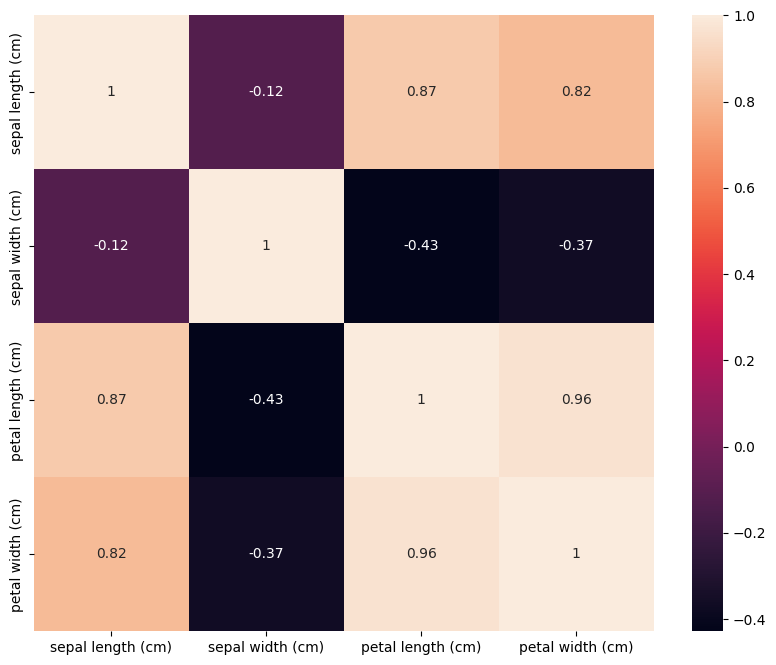

In [10]:
plot_heatmap(n_data)

## K-Means

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(X_iris)

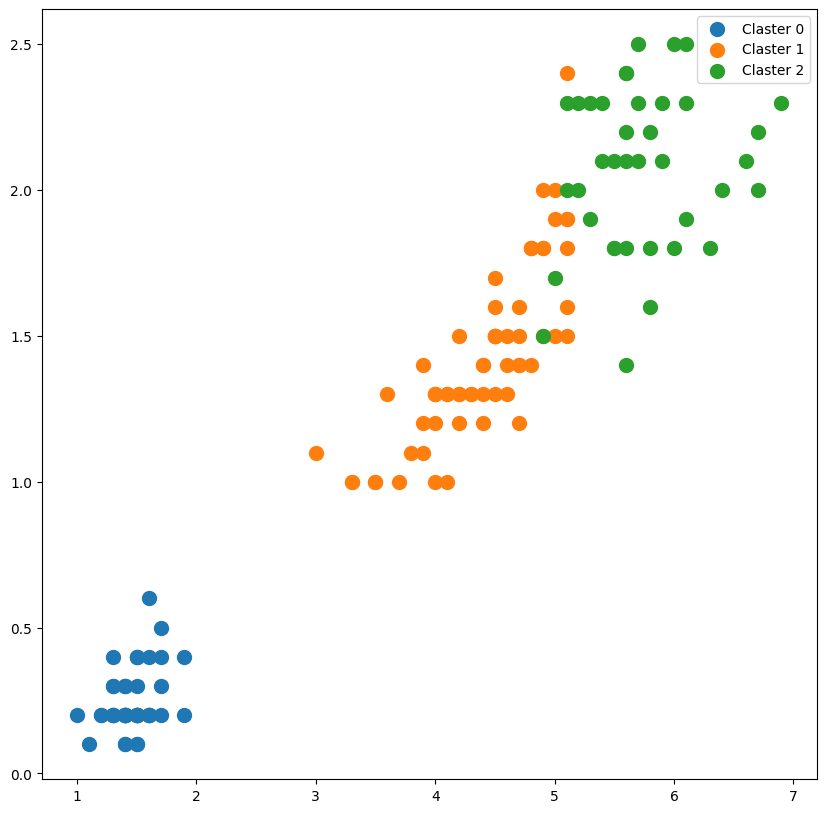

In [60]:
plot_clusters(X_iris, clusters, (2,3))

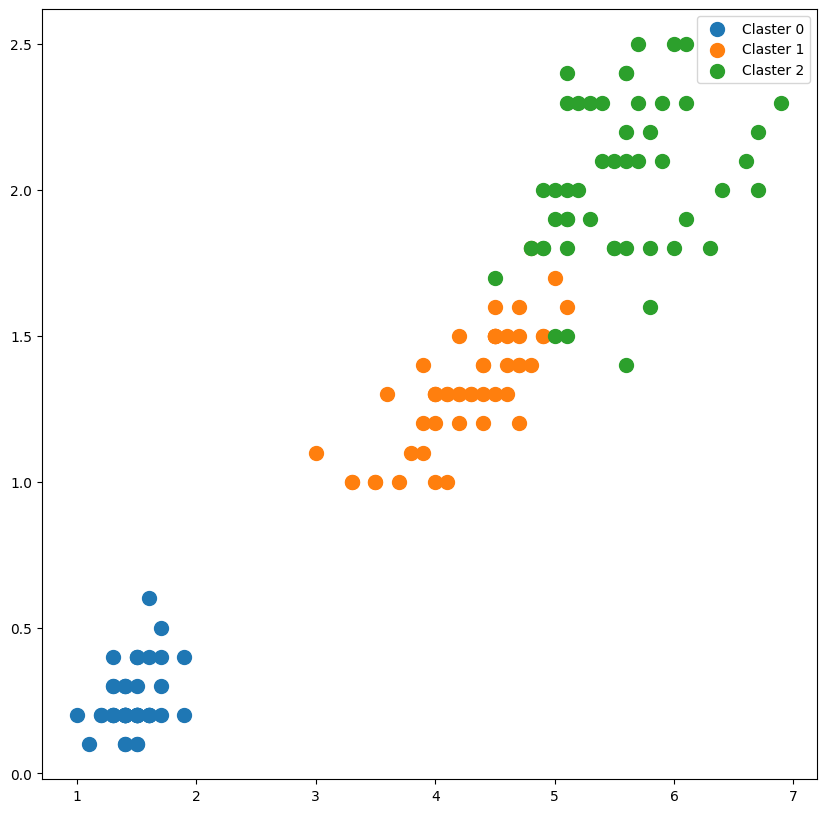

In [61]:
plot_clusters(X_iris, y_iris, (2,3))

## DB-Scan

Описание параметров:

1) Eps - радиус, который рисуется вокруг каждой точки.
2) min_samples - количество точек, которые попадают в круг, необходимое для определения текущей точки как `core` точки. Должно быть `num_features + 1`

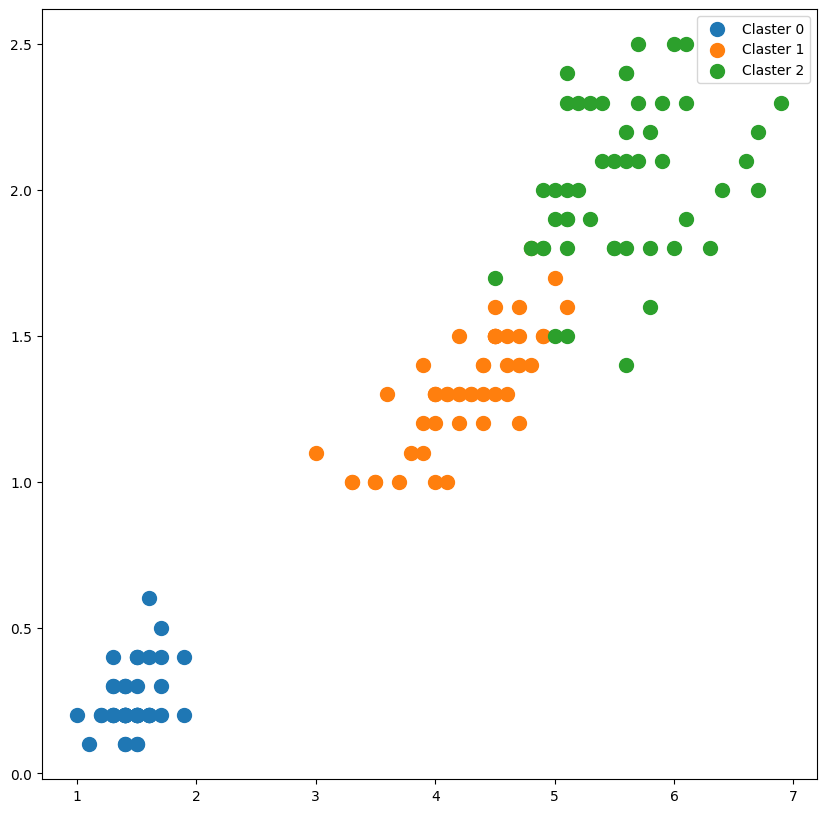

In [94]:
plot_clusters(X_iris, y_iris, (2,3))

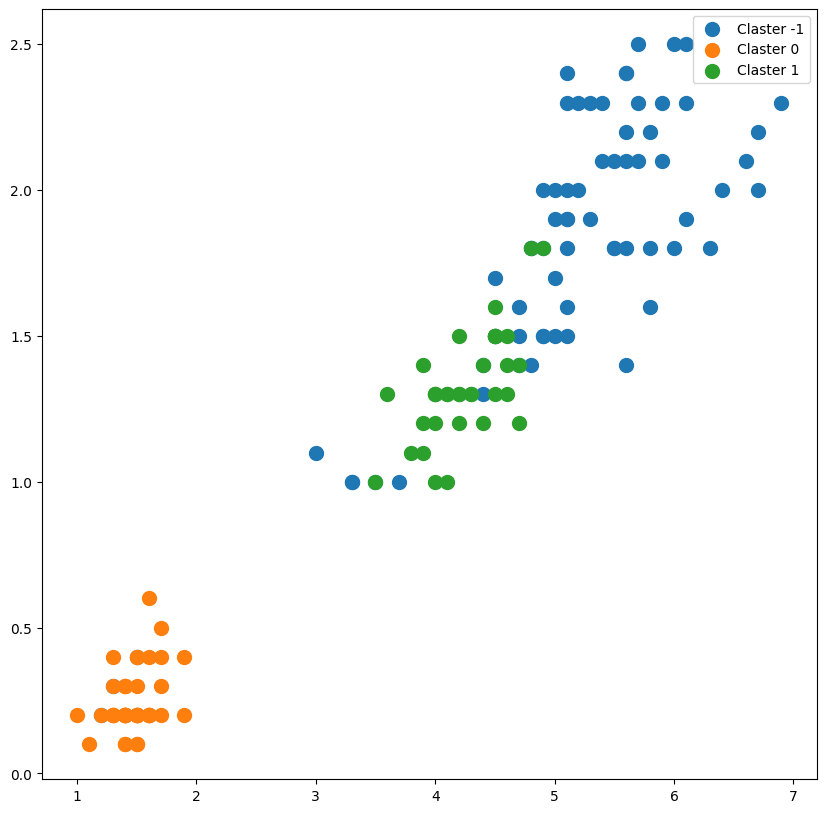

In [31]:
from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=0.72, min_samples=25, metric='euclidean') #f1 = 0.74
dbscan = DBSCAN(eps=0.8, min_samples=14, metric='l1') # f1 = 0.85
# dbscan = DBSCAN(eps=0.71, min_samples=25, metric='l2') # f1 = 0.85
clusters = dbscan.fit_predict(X_iris, y_iris)

plot_clusters(X_iris, clusters, (2, 3))

In [32]:
corrected_clusters = np.zeros_like(clusters)
corrected_clusters [clusters == -1] = 2
corrected_clusters [clusters == 0] = 0
corrected_clusters [clusters == 1] = 1
f1_score(y_iris, corrected_clusters, average='micro')

0.8533333333333335

In [91]:
corrected_clusters[np.array([15,32, 33,60])]

array([0, 0, 0, 1])

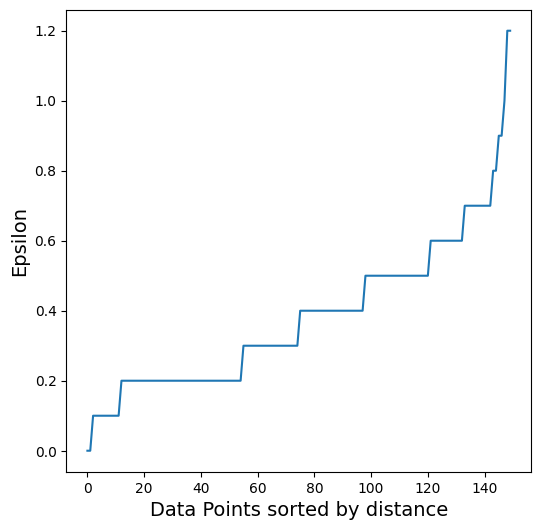

In [34]:
# Строим K-graph чтобы определить значение eps
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=14, metric='l1')
nbrs = nn.fit(X_iris)
distances, indices = nbrs.kneighbors(X_iris)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [35]:
# using scaled data
X_normed = n_data.to_numpy()

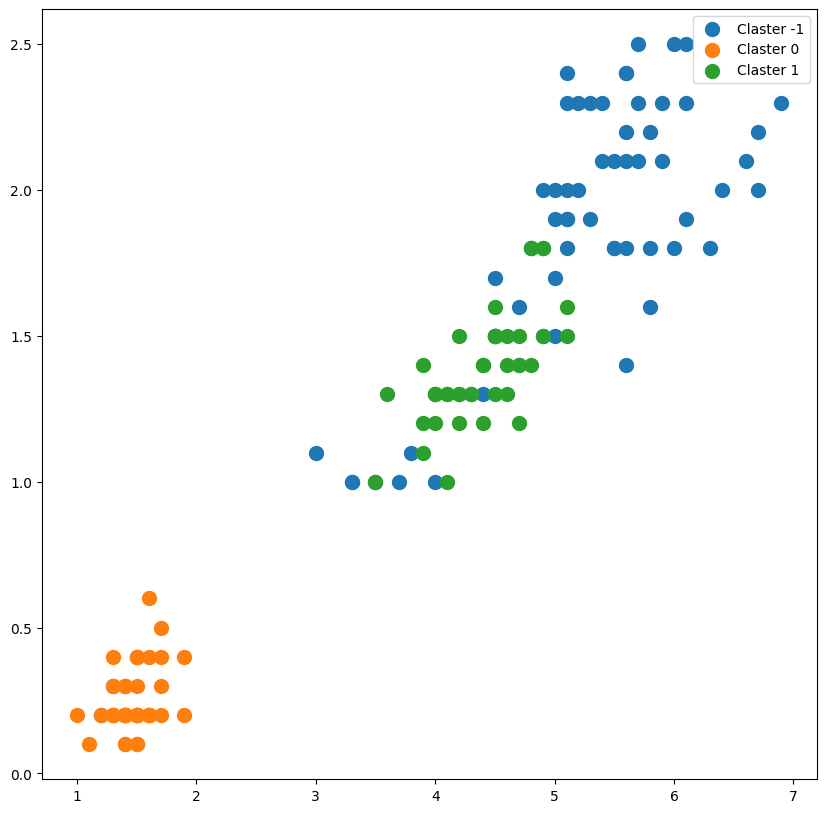

In [48]:
dbscan = DBSCAN(eps=0.261, min_samples=16, metric='l1') # f1 = 0.86
# dbscan = DBSCAN(eps=0.261, min_samples=16, metric='manhattan') # f1 = 0.86
# dbscan = DBSCAN(eps=0.009, min_samples=10, metric='cosine') # f1 = 0.86
clusters = dbscan.fit_predict(X_normed, y_iris)

plot_clusters(X_iris, clusters, (2, 3))

In [49]:
corrected_clusters = np.zeros_like(clusters)
corrected_clusters [clusters == -1] = 2
corrected_clusters [clusters == 0] = 0
corrected_clusters [clusters == 1] = 1
f1_score(y_iris, corrected_clusters, average='micro')

0.8599999999999999

## Иерархическая кластеризация

In [75]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=7)
clusters = agg_clustering.fit_predict(X_iris, y_iris)

# plot_clusters(X_iris, clusters, (2,3))

0.8933333333333333


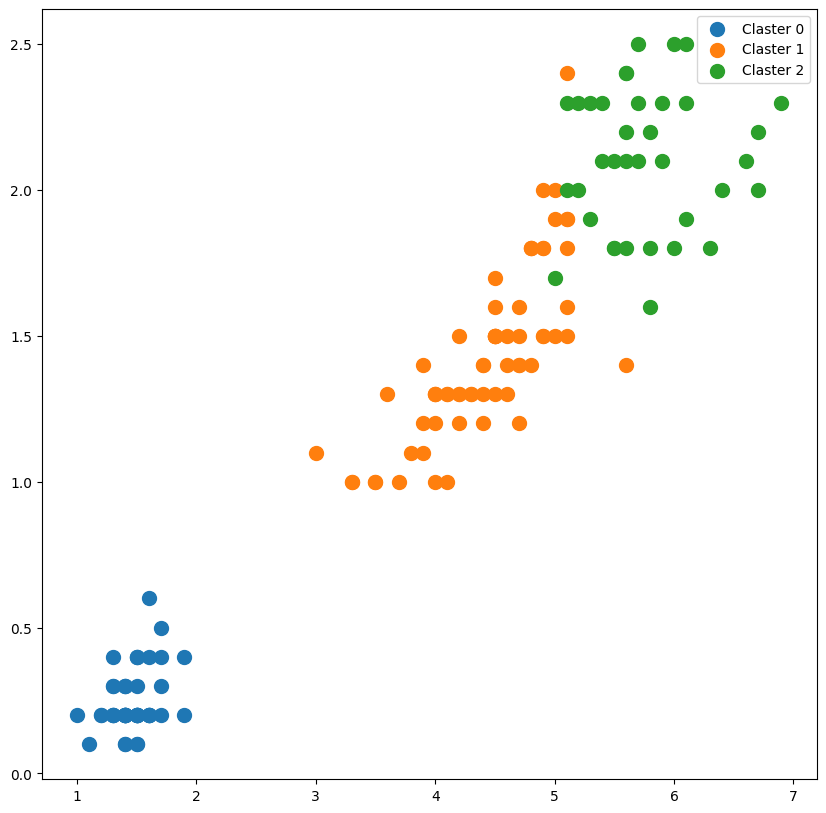

In [76]:
corrected_clusters = np.zeros_like(clusters)
corrected_clusters[clusters == 0] = 1
corrected_clusters[clusters == 1] = 0
corrected_clusters[clusters == 2] = 2
f1 = f1_score(y_iris, corrected_clusters, average='micro')
print(f1)
plot_clusters(X_iris, corrected_clusters, (2,3))


0.8933333333333333


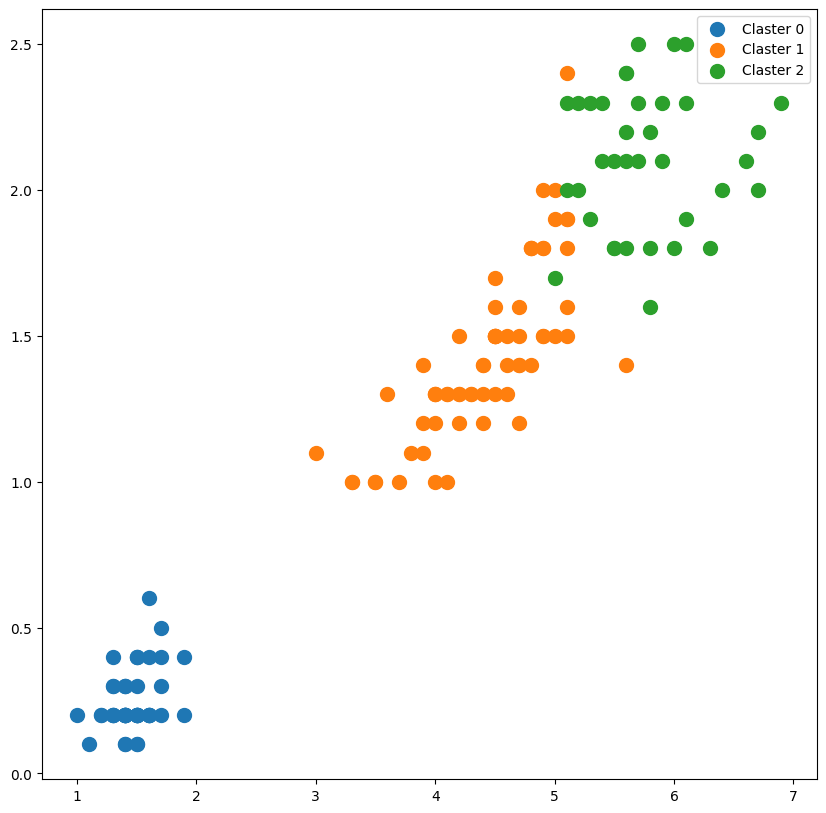

In [78]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, compute_full_tree=False, distance_threshold=None)
clusters = agg_clustering.fit_predict(X_iris, y_iris)

# plot_clusters(X_iris, clusters, (2,3))
corrected_clusters = np.zeros_like(clusters)
corrected_clusters[clusters == 0] = 1
corrected_clusters[clusters == 1] = 0
corrected_clusters[clusters == 2] = 2
f1 = f1_score(y_iris, corrected_clusters, average='micro')
print(f1)
plot_clusters(X_iris, corrected_clusters, (2,3))

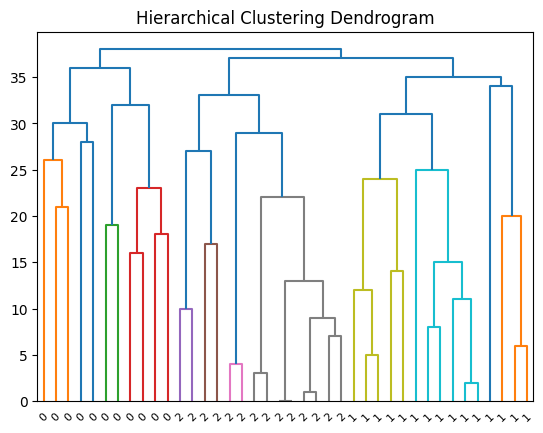

In [86]:
# https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:40]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()